In [35]:
import os
import opendatasets as od
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from sklearn.cluster import KMeans

In [ ]:
# Import data fom kaggle

In [3]:
url = "https://www.kaggle.com/datasets/carrie1/ecommerce-data"

In [54]:
od.download(url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vikaskagawad
Your Kaggle Key: ········


100%|██████████████████████████████████████| 7.20M/7.20M [00:01<00:00, 7.20MB/s]

In [7]:
data_directory = "./ecommerce-data"

In [8]:
os.listdir(data_directory)

['data.csv']

In [5]:
df = pd.read_csv("./ecommerce-data/data.csv", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
#1.Data Overview
#1.1 Rows and columns
print("Number of rows in dataset are:",df.shape[0])
print("Number of columns in dataset are:",df.shape[1])

Number of rows in dataset are: 541909
Number of columns in dataset are: 8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# InvoiceDate to datetime and customerID to object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [11]:
# 25% of Customer ID are null so we will delete them
df.dropna(subset=['CustomerID'], inplace=True)

In [12]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
df['CustomerID']= df['CustomerID'].astype(int).astype(str)

In [14]:
#1.2 Description about columns
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [15]:
#1.2 Description about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [16]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [17]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


In [18]:
df.drop_duplicates(keep='last', inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [19]:
#1.3 Time period of the dataset
min_date = re.sub(" .*","",str(min(df['InvoiceDate'])))
max_date = re.sub(" .*","",str(max(df['InvoiceDate'])))
print(f"Time period of the dataset is from {min_date} to {max_date} ")

Time period of the dataset is from 2010-12-01 to 2011-12-09 


In [20]:
df['Total Price'] = df['UnitPrice']*df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## Tasks

### RFM Calculation

In [21]:
#2.2 Recency
recency_df = df[['CustomerID','InvoiceDate']]
recent_date=max(recency_df.InvoiceDate)
#Calculate recency for each invoice
recent_date = recent_date + pd.DateOffset(days=1)
recency_df['Diff'] = recent_date - recency_df.InvoiceDate
recency_df

/var/folders/vw/d534bn6s4n93v5rfxxf3_my80000gn/T/ipykernel_28157/1035671463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency_df['Diff'] = recent_date - recency_df.InvoiceDate


,CustomerID,InvoiceDate,Diff
0,17850,2010-12-01 08:26:00,374 days 04:24:00
1,17850,2010-12-01 08:26:00,374 days 04:24:00
2,17850,2010-12-01 08:26:00,374 days 04:24:00
3,17850,2010-12-01 08:26:00,374 days 04:24:00
4,17850,2010-12-01 08:26:00,374 days 04:24:00
...,...,...,...
541904,12680,2011-12-09 12:50:00,1 days 00:00:00
541905,12680,2011-12-09 12:50:00,1 days 00:00:00
541906,12680,2011-12-09 12:50:00,1 days 00:00:00
541907,12680,2011-12-09 12:50:00,1 days 00:00:00


In [22]:
rfm_df = recency_df.groupby('CustomerID')['Diff'].min().reset_index()
rfm_df.columns=["CustomerID","Recency"]
rfm_df

,CustomerID,Recency
0,12346,326 days 02:33:00
1,12347,2 days 20:58:00
2,12348,75 days 23:37:00
3,12349,19 days 02:59:00
4,12350,310 days 20:49:00
...,...,...
4367,18280,278 days 02:58:00
4368,18281,181 days 01:57:00
4369,18282,8 days 01:07:00
4370,18283,4 days 00:48:00


In [23]:
#2.3 Frequency
frequency_df = df.groupby("CustomerID")["InvoiceNo"].count().reset_index()
frequency_df.columns=["CustomerID","Frequency"]
frequency_df

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4367,18280,10
4368,18281,7
4369,18282,13
4370,18283,721


In [24]:
rfm_df = rfm_df.merge(frequency_df, on="CustomerID")
rfm_df

,CustomerID,Recency,Frequency
0,12346,326 days 02:33:00,2
1,12347,2 days 20:58:00,182
2,12348,75 days 23:37:00,31
3,12349,19 days 02:59:00,73
4,12350,310 days 20:49:00,17
...,...,...,...
4367,18280,278 days 02:58:00,10
4368,18281,181 days 01:57:00,7
4369,18282,8 days 01:07:00,13
4370,18283,4 days 00:48:00,721


In [25]:
#2.4 Monetary
monetary_df = df.groupby("CustomerID")["Total Price"].sum().reset_index()
monetary_df.columns = ["CustomerID","Monetary"]
monetary_df

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2045.53


In [26]:
rfm_df = rfm_df.merge(monetary_df, on="CustomerID")
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326 days 02:33:00,2,0.00
1,12347,2 days 20:58:00,182,4310.00
2,12348,75 days 23:37:00,31,1797.24
3,12349,19 days 02:59:00,73,1757.55
4,12350,310 days 20:49:00,17,334.40
...,...,...,...,...
4367,18280,278 days 02:58:00,10,180.60
4368,18281,181 days 01:57:00,7,80.82
4369,18282,8 days 01:07:00,13,176.60
4370,18283,4 days 00:48:00,721,2045.53


In [27]:
rfm_df['Recency']=rfm_df['Recency'].dt.days
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40
...,...,...,...,...
4367,18280,278,10,180.60
4368,18281,181,7,80.82
4369,18282,8,13,176.60
4370,18283,4,721,2045.53


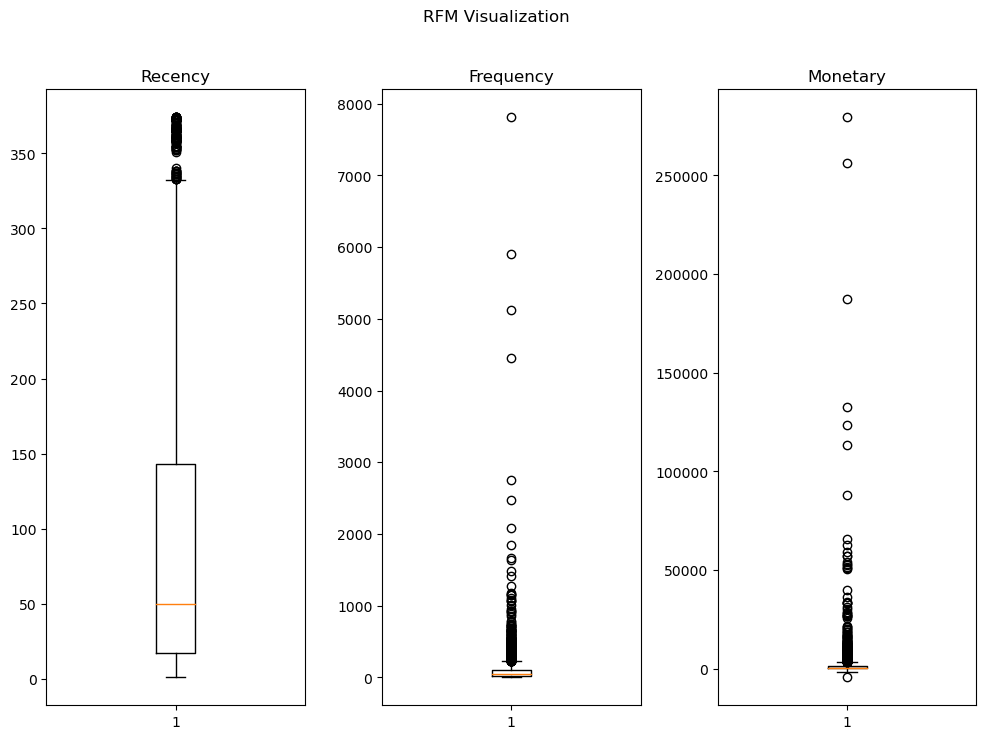

In [28]:
#RFM Visualization before oultier treatment
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(1,3, wspace=0.3)
axs = gs.subplots(sharex=False, sharey=False)
fig.suptitle('RFM Visualization')
axs[0].boxplot(rfm_df['Recency'])
axs[0].set_title("Recency")
axs[1].boxplot(rfm_df['Frequency'])
axs[1].set_title("Frequency")
axs[2].boxplot(rfm_df['Monetary'])
axs[2].set_title("Monetary")
plt.show()

In [29]:
# outlier treatment for RFM
Q1m = rfm_df['Monetary'].quantile(0.25)
Q3m = rfm_df['Monetary'].quantile(0.75)
IQRm = Q3m - Q1m
rfm_df = rfm_df[(rfm_df['Monetary'] >= Q1m - 1.5*IQRm) & (rfm_df['Monetary'] <= Q3m + 1.5*IQRm)]
Q1f = rfm_df['Frequency'].quantile(0.25)
Q3f = rfm_df['Frequency'].quantile(0.75)
IQRf = Q3f - Q1f
rfm_df = rfm_df[(rfm_df['Frequency'] >= Q1f - 1.5*IQRf) & (rfm_df['Frequency'] <= Q3f + 1.5*IQRf)]
Q1r = rfm_df['Recency'].quantile(0.25)
Q3r = rfm_df['Recency'].quantile(0.75)
IQRr = Q3r - Q1r
rfm_df = rfm_df[(rfm_df['Recency'] >= Q1r - 1.5*IQRr) & (rfm_df['Recency'] <= Q3r + 1.5*IQRr)]
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40
5,12352,36,95,1545.41
...,...,...,...,...
4366,18278,74,9,173.90
4367,18280,278,10,180.60
4368,18281,181,7,80.82
4369,18282,8,13,176.60


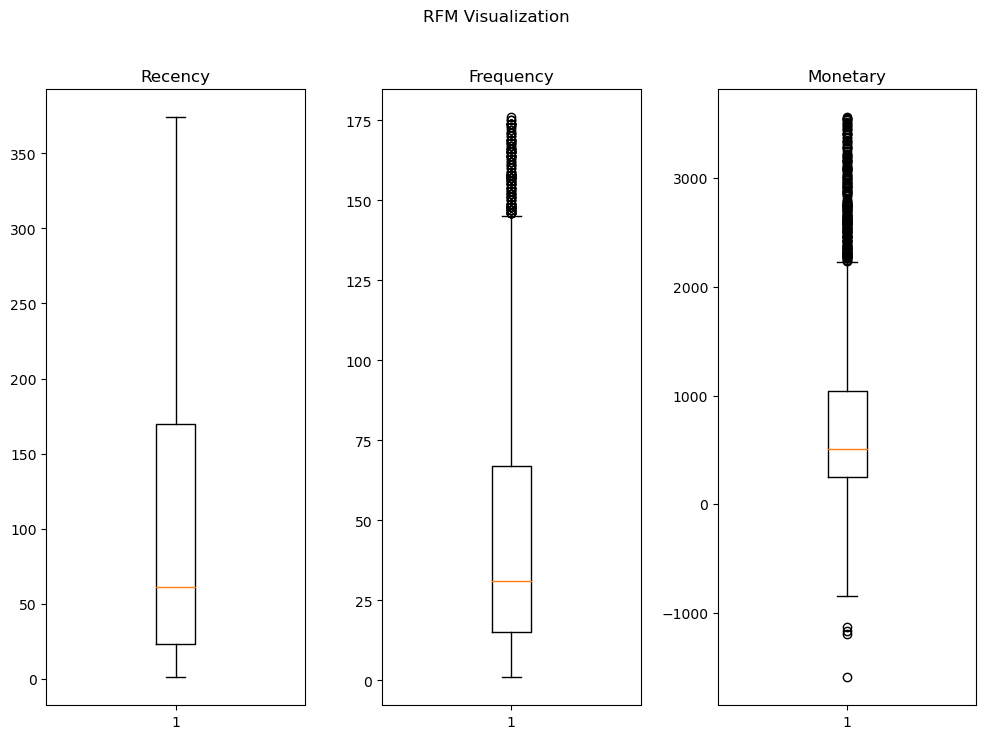

In [30]:
#RFM Visualization after oultier treatment
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(1,3, wspace=0.3)
axs = gs.subplots(sharex=False, sharey=False)
fig.suptitle('RFM Visualization')
axs[0].boxplot(rfm_df['Recency'])
axs[0].set_title("Recency")
axs[1].boxplot(rfm_df['Frequency'])
axs[1].set_title("Frequency")
axs[2].boxplot(rfm_df['Monetary'])
axs[2].set_title("Monetary")
plt.show()

In [31]:
#RFM Segmentation
# standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit_transform(rfm_df)

array([[-1.72558978,  2.13727356, -1.07413759, -1.04176195],
       [-1.7244252 , -0.28178068, -0.37022813,  1.39975609],
       [-1.72384291, -0.82148999,  0.64922695,  1.34583794],
       ...,
       [ 1.73029055,  0.73981194, -0.95277389, -0.93196944],
       [ 1.73087284, -0.92750432, -0.80713745, -0.80185404],
       [ 1.73378428, -0.590186  ,  0.57640873,  1.45414971]])

In [36]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(rfm_df)
    ssd.append(model_clus.inertia_)

/Users/vikaskagawad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikaskagawad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikaskagawad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikaskagawad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

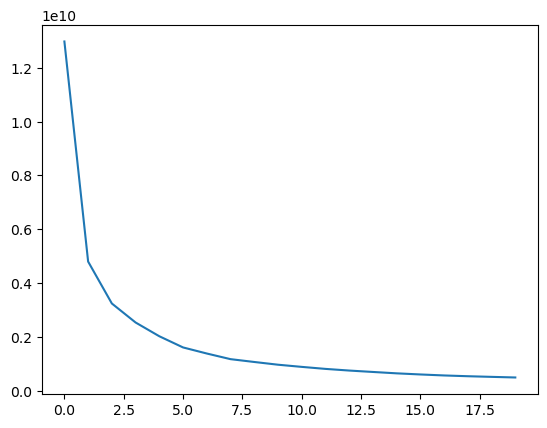

In [37]:
#Plot elbow curve
plt.plot(ssd)
plt.show()

In [38]:
model_clus3 = KMeans(n_clusters = 3, max_iter=50, n_init=10)
model_clus3.fit(rfm_df)

KMeans(max_iter=50, n_clusters=3, n_init=10)

In [39]:
# analysis of clusters formed
rfm_df.index = pd.RangeIndex(len(rfm_df.index))
RFM_km = pd.concat([rfm_df, pd.Series(model_clus3.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["Cluster"]).Monetary.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["Cluster"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["Cluster"]).Recency.mean())

In [40]:
km_clusters = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
km_clusters.columns = ["Cluster", "Amount_mean", "Frequency_mean", "Recency_mean"]
km_clusters.head()

,Cluster,Amount_mean,Frequency_mean,Recency_mean
0,0,744.279510,46.068438,105.710145
1,1,688.262498,45.983727,104.403580
2,2,868.104331,46.707555,102.585703


Visualization of Clusters

In [43]:
# Adding clusters to rfm dataframe
rfm_df['Clusters'] = model_clus3.labels_

<Axes: xlabel='Recency', ylabel='Frequency'>

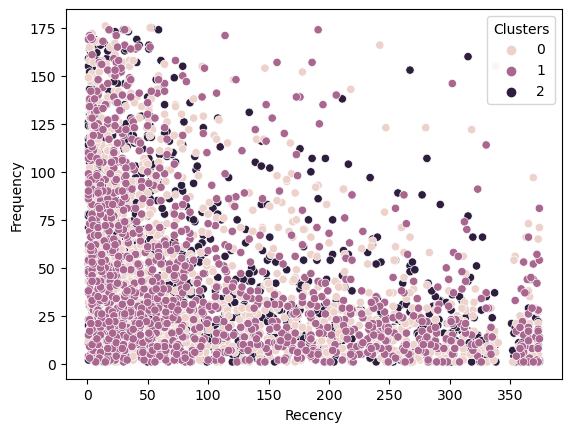

In [46]:
# Recency vs Frequency
sns.scatterplot(x='Recency',y='Frequency',data=rfm_df,hue='Clusters')

<Axes: xlabel='Recency', ylabel='Monetary'>

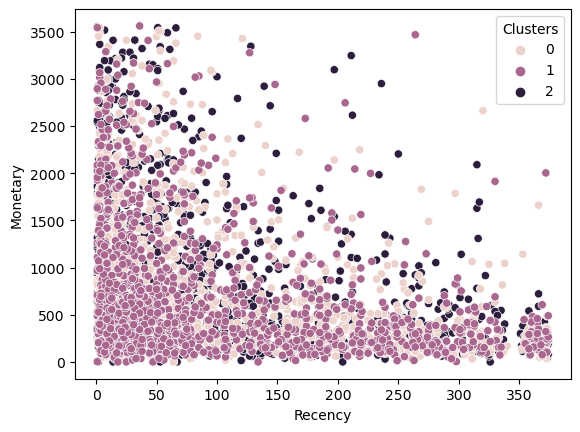

In [51]:
# Recency vs Monetary
sns.scatterplot(x='Recency',y=rfm_df[rfm_df['Monetary']>=0]['Monetary'],data=rfm_df,hue='Clusters')

<Axes: xlabel='Frequency', ylabel='Monetary'>

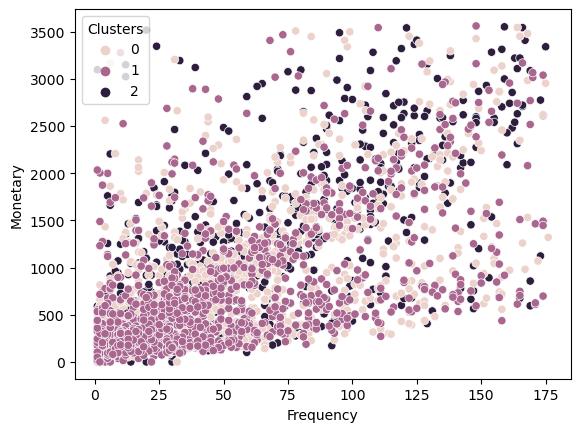

In [52]:
# Frequency vs Monetary
sns.scatterplot(x='Frequency',y=rfm_df[rfm_df['Monetary']>=0]['Monetary'],data=rfm_df,hue='Clusters')

<Axes: xlabel='Cluster', ylabel='Amount_mean'>

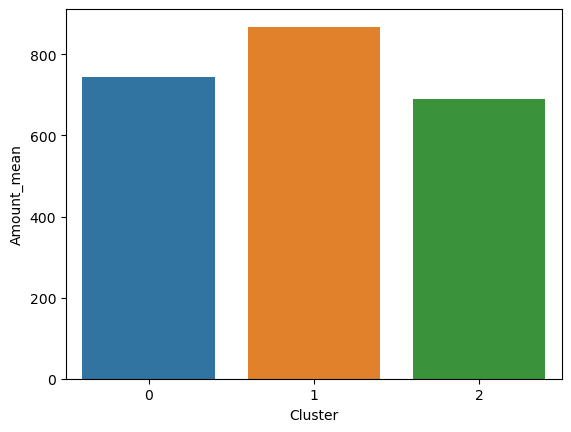

In [41]:
sns.barplot(data=km_clusters, x='Cluster', y='Amount_mean')

<Axes: xlabel='Cluster', ylabel='Frequency_mean'>

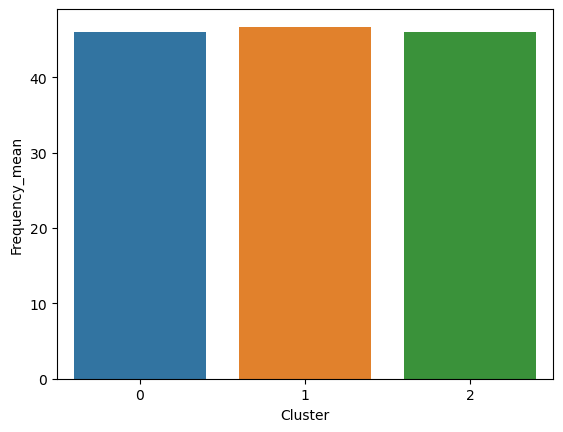

In [42]:
sns.barplot(data=km_clusters, x='Cluster', y='Frequency_mean')

<Axes: xlabel='Cluster', ylabel='Recency_mean'>

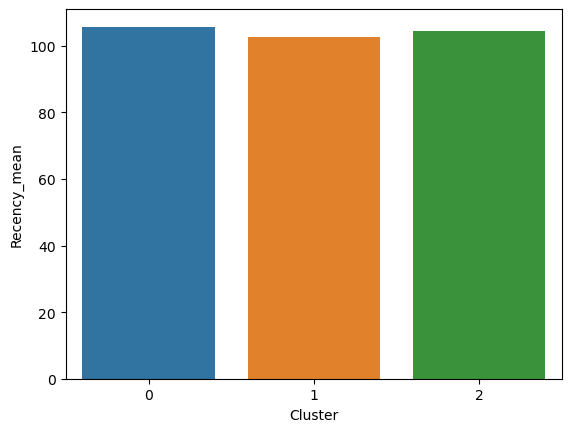

In [43]:
sns.barplot(data=km_clusters, x='Cluster', y='Recency_mean')

## Questions

In [44]:
#2 Customer Analysis
#2.1 Number of unique customers 
print("Number of unique customers:",df['CustomerID'].nunique())

Number of unique customers: 4372


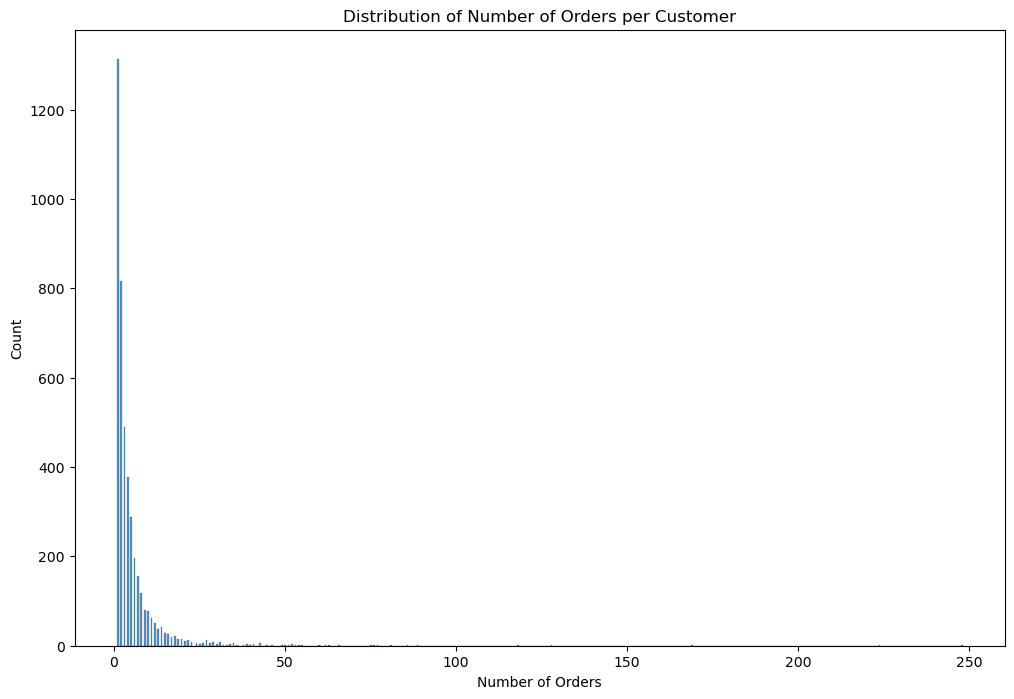

In [45]:
#2.2 Distribution of number of orders per customer
order_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(12, 8))
sns.histplot(x=order_per_customer)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Count')
plt.show()

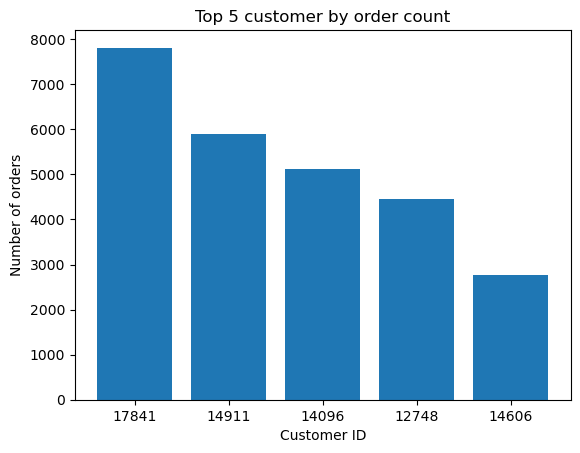

In [46]:
#2.3 Top 5 customers by order count
top_5 = df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False).head(5)
plt.bar(x = list(top_5.index),height= list(top_5.values))
plt.title("Top 5 customer by order count")
plt.xlabel('Customer ID')
plt.ylabel('Number of orders')
plt.show()

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: Description, Length: 3896, dtype: int64


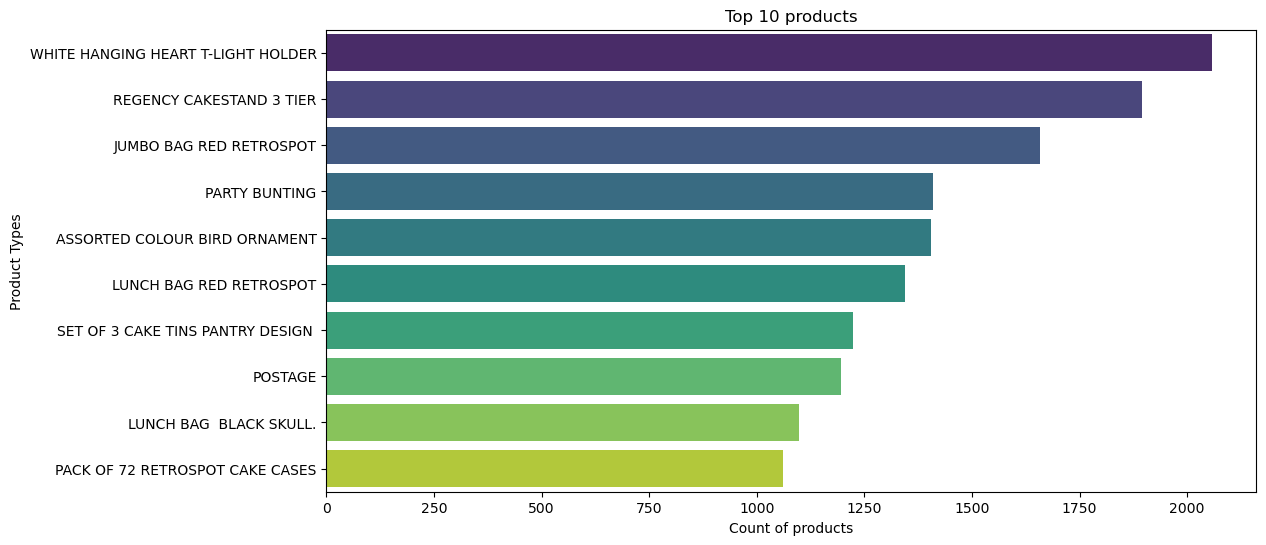

Most purchased type of item is:   WHITE HANGING HEART T-LIGHT HOLDER    2058
Name: Description, dtype: int64  


In [47]:
#3. Product Analysis
#3.1
print(df['Description'].value_counts())
top_products=df['Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Description'].isin(top_products.index)], y='Description', order=top_products.index, palette='viridis')
plt.xlabel("Count of products")
plt.ylabel("Product Types")
plt.title("Top 10 products")
plt.show()
print("\033[1mMost purchased type of item is:  " , top_products.head(1)," \033[0m")

In [48]:
#3.2
product_df = df.groupby('Description').agg({
    'UnitPrice': 'mean',
    'Total Price': 'sum'
}).reset_index()
product_df.columns=['Product','Average Unit Price','Total Revenue']
product_df

,Product,Average Unit Price,Total Revenue
0,4 PURPLE FLOCK DINNER CANDLES,2.312162,265.66
1,50'S CHRISTMAS GIFT BAG LARGE,1.248091,2269.75
2,DOLLY GIRL BEAKER,1.243796,2745.75
3,I LOVE LONDON MINI BACKPACK,4.138406,1449.85
4,I LOVE LONDON MINI RUCKSACK,4.150000,4.15
...,...,...,...
3891,ZINC T-LIGHT HOLDER STARS SMALL,0.836888,3843.46
3892,ZINC TOP 2 DOOR WOODEN SHELF,16.768182,92.75
3893,ZINC WILLIE WINKIE CANDLE STICK,0.872344,2165.90
3894,ZINC WIRE KITCHEN ORGANISER,7.175000,156.80


In [49]:
product_df.describe()

,Average Unit Price,Total Revenue
count,3896.000000,3896.000000
mean,3.993164,2124.876649
std,19.668337,5403.630535
min,0.000750,-58745.460000
25%,1.019722,107.070000
50%,1.950000,558.355000
75%,3.886952,1930.900000
max,744.147500,132567.700000


In [50]:
#3.3
highest_revenue_cat = product_df[product_df['Total Revenue']==product_df['Total Revenue'].max()]
print("Highest revenue product category is:\n ", highest_revenue_cat)

Highest revenue product category is:
                         Product  Average Unit Price  Total Revenue
2780  REGENCY CAKESTAND 3 TIER           12.428511       132567.7


         Day  Number of Sales per day of week
0     Friday                            55512
1     Monday                            65715
2     Sunday                            61673
3   Thursday                            81575
4    Tuesday                            67376
5  Wednesday                            69753


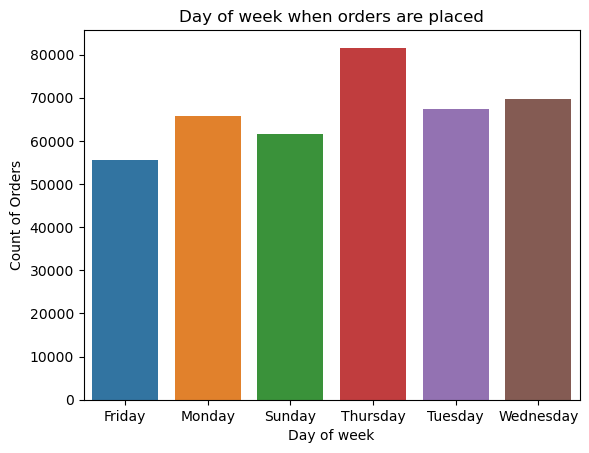

In [51]:
#4 Time Analysis
#4.1 
time_df = df.reset_index()
time_df['Day of Week'] = time_df['InvoiceDate'].dt.day_name()
sales_DOW = time_df.groupby('Day of Week')['InvoiceNo'].count().reset_index()
sales_DOW.columns=['Day','Number of Sales per day of week']
print(sales_DOW)
sns.barplot(data=sales_DOW, x='Day', y='Number of Sales per day of week')
plt.xlabel("Day of week")
plt.ylabel("Count of Orders")
plt.title("Day of week when orders are placed")
plt.show()

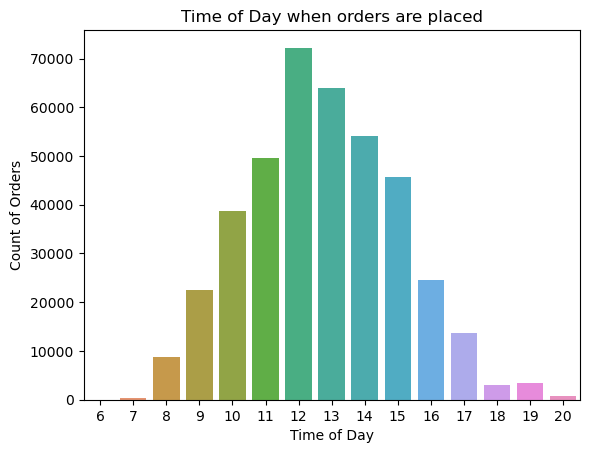

In [52]:
#4.1
time_df['Time of Day'] = time_df['InvoiceDate'].dt.hour
sns.countplot(data=time_df, x='Time of Day')
plt.xlabel("Time of Day")
plt.ylabel("Count of Orders")
plt.title("Time of Day when orders are placed")
plt.show()

4.2 Since the data doesn't include order processing time, average order processing time cannot be calculated

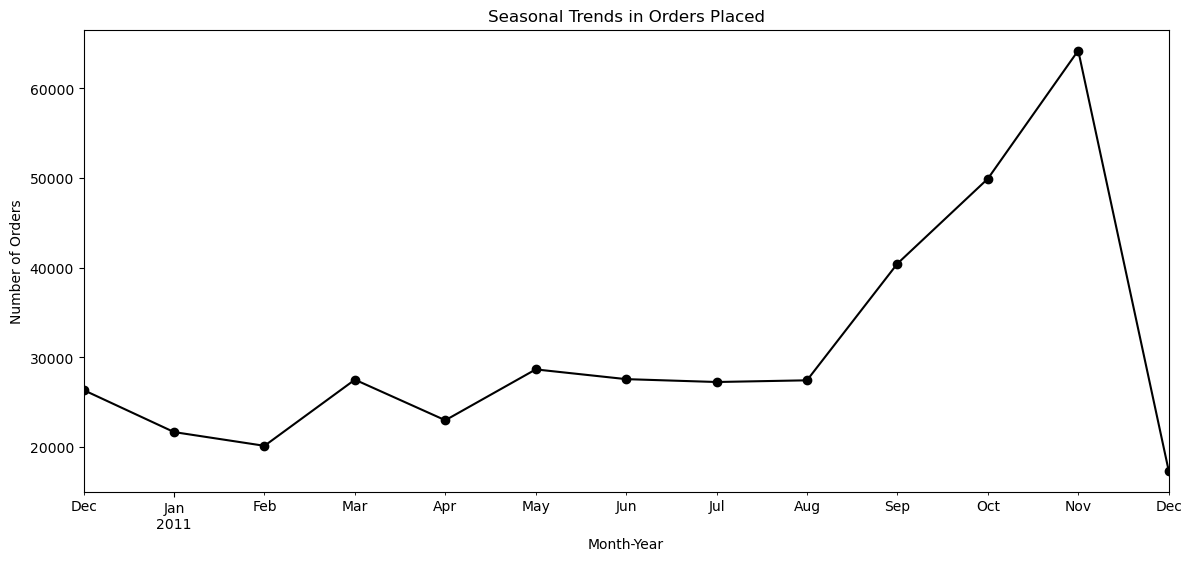

In [53]:
#4.3
time_df['Month'] = time_df['InvoiceDate'].dt.to_period('M')
orders_per_month = time_df.groupby('Month').size()
plt.figure(figsize=(14, 6))
orders_per_month.plot.line(marker='o', color='black')
plt.title('Seasonal Trends in Orders Placed')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.show()

In [54]:
#5 Geographical Analysis
#5.1
orders_per_country = df.groupby('Country').size().reset_index(name='Number of Orders')
orders_per_country.sort_values(by = 'Number of Orders', ascending=False, inplace=True)
orders_per_country.head()

,Country,Number of Orders
35,United Kingdom,356728
14,Germany,9480
13,France,8475
10,EIRE,7475
30,Spain,2528


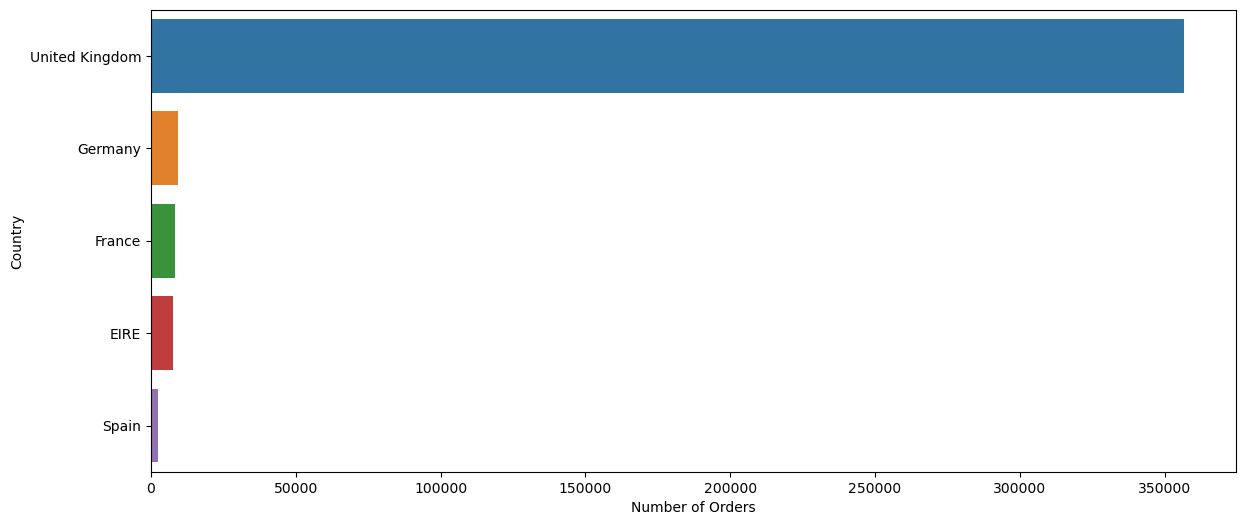

In [64]:
plt.figure(figsize=(14, 6))
sns.barplot(data=orders_per_country.head(), x='Number of Orders', y='Country')
plt.show()

In [55]:
from geopy.geocoders import Nominatim
from tqdm.notebook import tqdm
tqdm.pandas()
geolocator = Nominatim(user_agent="bytescout", timeout=None)
def get_loc_coordinate(location):
    location = geolocator.geocode(query = location)
    return location.latitude, location.longitude
orders_per_country[["lat", "long"]] = orders_per_country['Country'].progress_apply(lambda x:
pd.Series([get_loc_coordinate(x)[0], get_loc_coordinate(x)[1]]))
lat_longs = list(map(list, zip(orders_per_country["lat"],orders_per_country["long"],orders_per_country["Number of Orders"])))
map_object = folium.Map(location = [55, 0], zoom_start = 3)
HeatMap(lat_longs).add_to(map_object)
map_object

  0%|          | 0/37 [00:00<?, ?it/s]

In [56]:
#5.2
df_country = df.groupby('Country')['Total Price'].mean().reset_index(name='Average Country Sales')
df_country.sort_values(by = 'Average Country Sales', ascending=False, inplace=True)
df_country

,Country,Average Country Sales
23,Netherlands,120.059696
0,Australia,108.910787
19,Japan,98.716816
31,Sweden,79.360976
9,Denmark,48.247147
21,Lithuania,47.458857
29,Singapore,39.827031
20,Lebanon,37.641778
4,Brazil,35.737500
10,EIRE,33.445054


In [57]:
#6 Payment Analysis
import random
weights_ran=[]
for weight in range(6):
    weights_ran.append(random.randint(0,10))
print(weights_ran)
payment_methods=["Credit/Debit cards","Digital Wallets","Bank Transfer","Cash on Delivery","Mobile Payments","Buy now, Pay Later"]
df['Payment Method'] = pd.Series(random.choices(payment_methods, weights=weights_ran, k=len(df)), index=df.index)
df

[9, 8, 3, 7, 7, 5]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Payment Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Digital Wallets
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Mobile Payments
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Cash on Delivery
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,"Buy now, Pay Later"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Digital Wallets
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Cash on Delivery
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Digital Wallets
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,"Buy now, Pay Later"
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,"Buy now, Pay Later"


Text(0.5, 1.0, 'Payment Methods for Orders Placed')

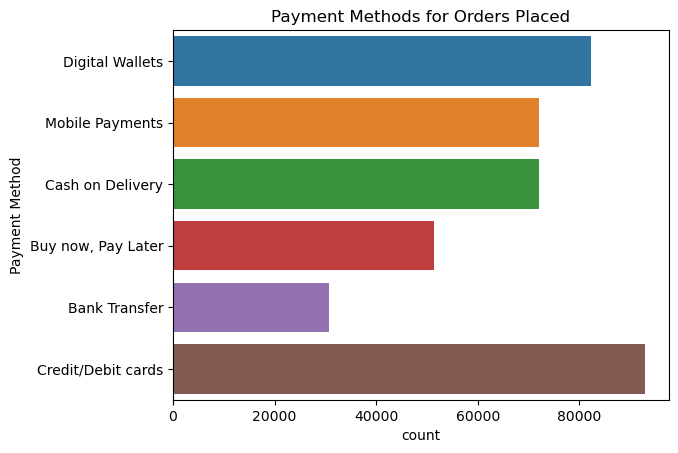

In [58]:
#6.1
sns.countplot(data=df, y='Payment Method')
plt.title('Payment Methods for Orders Placed')

<Figure size 1800x600 with 0 Axes>

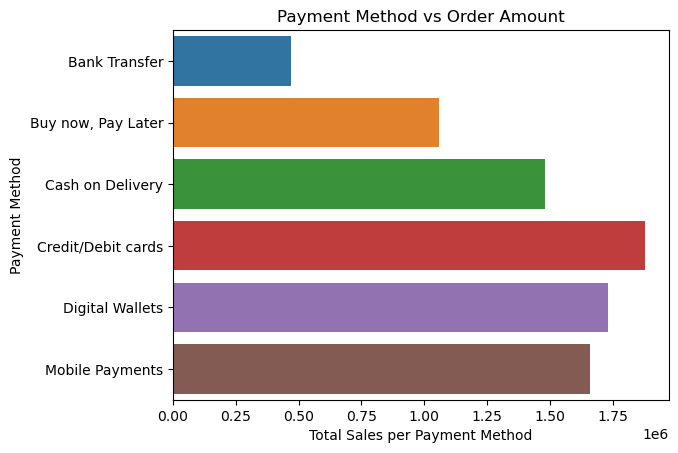

In [59]:
#6.2
payment_df = df.groupby('Payment Method')['Total Price'].sum().reset_index(name='Total Sales per Payment Method')
plt.figure(figsize=(18, 6))
fig, ax = plt.subplots()
sns.barplot(data=payment_df, y='Payment Method', x='Total Sales per Payment Method')
plt.title('Payment Method vs Order Amount')
plt.show()

Average duration of customer activity: 133.38586459286367


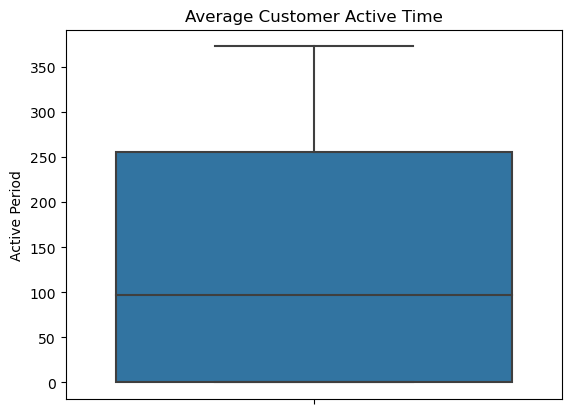

In [72]:
#7.1 Customer Behavior
customer_activity_duration = df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.max() - x.min()).reset_index()
customer_activity_duration.columns=["CustomerID","Active Period"]
customer_activity_duration["Active Period"] = customer_activity_duration["Active Period"].dt.days
average_duration = customer_activity_duration["Active Period"].mean()
print(f"Average duration of customer activity: {average_duration}")
sns.boxplot(data=customer_activity_duration,y="Active Period")
plt.title("Average Customer Active Time")
plt.show()

In [74]:
#8. Returns and Refunds
df[df['Description'].apply(lambda x: True if 'return' in str.lower(x) else False)==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Payment Method


In [76]:
df[df['Description'].apply(lambda x: True if 'refund' in str.lower(x) else False)==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Payment Method


In [77]:
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Payment Method
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,Credit/Debit cards
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,"Buy now, Pay Later"
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,Digital Wallets
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,Mobile Payments
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,Mobile Payments
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13,Cash on Delivery
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69,Cash on Delivery
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75,Cash on Delivery
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25,Bank Transfer


8. Returns and Refunds are not mentioned in this Dataset, so Returns and Refund Analysis cannot be calculated

In [84]:
#9.Profitability Analysis
df['Profit'] = df['Total Price'] * (np.random.uniform(-0.1, 0.3, len(df)))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Payment Method,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Digital Wallets,-1.137111
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Mobile Payments,0.208026
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Cash on Delivery,0.352971
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,"Buy now, Pay Later",-0.331101
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Digital Wallets,-0.966832
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Cash on Delivery,2.506783
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Digital Wallets,3.076711
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,"Buy now, Pay Later",4.626268
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,"Buy now, Pay Later",-0.182928


In [87]:
#9.1
profit_total = df['Profit'].sum()
total_revenue = df['Total Price'].sum()
print("Total Profit generated: ", profit_total)
print("Profit Percentage: ", (profit_total/total_revenue)*100)

Total Profit generated:  827813.4737480895
Profit Percentage:  9.999535319663574


In [93]:
#9.2
df_product = df.groupby('Description').agg({
    'UnitPrice': 'mean',
    'Total Price': 'sum',
    'Profit': 'sum'
}).reset_index()
df_product.columns= ['Product','Average Unit Price','Total Revenue','Total Profit']
df_product.sort_values(by='Total Profit', ascending=False, inplace=True)
df_product.head()

,Product,Average Unit Price,Total Revenue,Total Profit
2780,REGENCY CAKESTAND 3 TIER,12.428511,132567.70,12687.977124
3716,WHITE HANGING HEART T-LIGHT HOLDER,2.891020,93767.80,10196.746006
2624,POSTAGE,37.888528,66710.24,8844.645728
2405,PICNIC BASKET WICKER 60 PIECES,649.500000,39619.50,8409.108254
1771,JUMBO BAG RED RETROSPOT,2.013140,83056.52,7136.031615


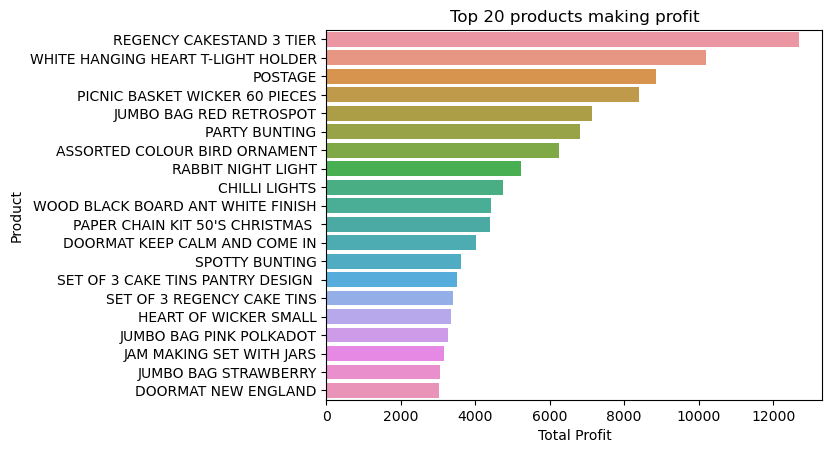

In [95]:
sns.barplot(data=df_product.head(20), x="Total Profit", y="Product")
plt.title("Top 20 products making profit")
plt.show()

In [96]:
#10. Customer Satisfaction
df['Customer Satisfaction'] = np.random.randint(1, 6, len(df))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Payment Method,Profit,Customer Satisfaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Digital Wallets,-1.137111,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Mobile Payments,0.208026,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Cash on Delivery,0.352971,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,"Buy now, Pay Later",-0.331101,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Digital Wallets,-0.966832,2
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Cash on Delivery,2.506783,2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Digital Wallets,3.076711,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,"Buy now, Pay Later",4.626268,2
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,"Buy now, Pay Later",-0.182928,2


In [98]:
#10.1
customer_satisfaction = df.groupby('Description')['Customer Satisfaction'].mean().reset_index()
customer_satisfaction.columns=["Product","Average Product Customer Satisfaction"]
customer_satisfaction

,Product,Average Product Customer Satisfaction
0,4 PURPLE FLOCK DINNER CANDLES,2.810811
1,50'S CHRISTMAS GIFT BAG LARGE,3.145455
2,DOLLY GIRL BEAKER,3.218978
3,I LOVE LONDON MINI BACKPACK,2.782609
4,I LOVE LONDON MINI RUCKSACK,1.000000
...,...,...
3891,ZINC T-LIGHT HOLDER STARS SMALL,3.120332
3892,ZINC TOP 2 DOOR WOODEN SHELF,2.636364
3893,ZINC WILLIE WINKIE CANDLE STICK,3.223958
3894,ZINC WIRE KITCHEN ORGANISER,3.333333


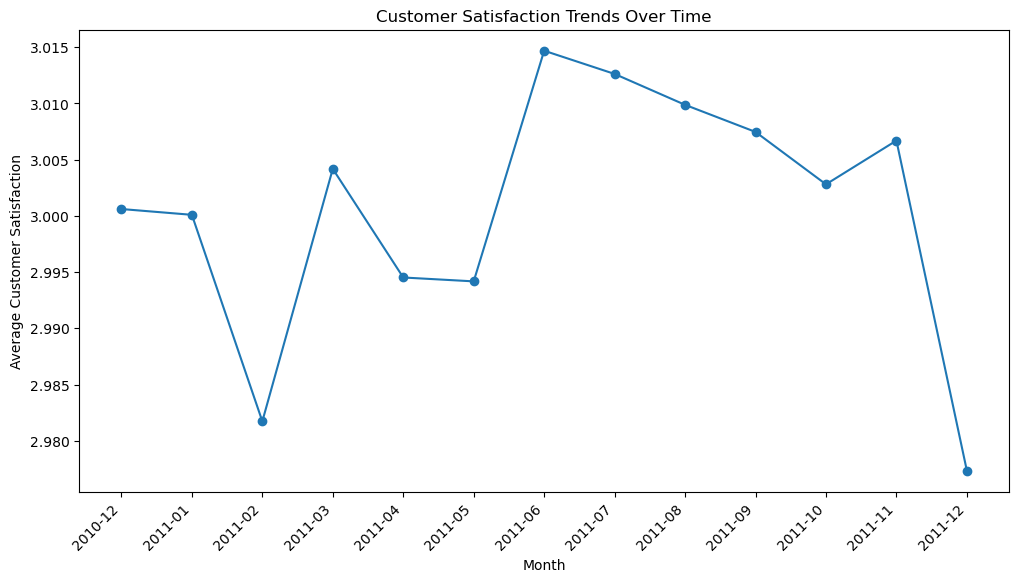

In [99]:
#10.2
satisfaction_trends = df.groupby(df['InvoiceDate'].dt.to_period("M"))['Customer Satisfaction'].mean()

plt.figure(figsize=(12, 6))
plt.plot(satisfaction_trends.index.astype(str), satisfaction_trends.values, marker='o')
plt.title('Customer Satisfaction Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Customer Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()